In [ ]:
!pip install "sagemaker>=2.48.0" "transformers==4.6.1" "datasets[s3]==1.6.2" --upgrade

  Using cached sagemaker-2.207.1-py3-none-any.whl (1.4 MB)
  Using cached transformers-4.6.1-py3-none-any.whl (2.2 MB)
  Using cached datasets-1.6.2-py3-none-any.whl (221 kB)
  Using cached huggingface_hub-0.0.8-py3-none-any.whl (34 kB)
  Using cached sacremoses-0.1.1-py3-none-any.whl (897 kB)
  Using cached tokenizers-0.10.3.tar.gz (212 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached dill-0.3.8-py3-none-any.whl (116 kB)
  Using cached tqdm-4.49.0-py2.py3-none-any.whl (69 kB)
  Using cached multiprocess-0.70.16-py310-none-any.whl (134 kB)
  Using cached boto3-1.16.43-py2.py3-none-any.whl (130 kB)
  Using cached botocore-1.19.52-py2.py3-none-any.whl (7.2 MB)
  Using cached s3fs-2024.2.0-py3-none-any.whl (28 kB)
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
  Using cached s3transfer-0.3.7-py2.py3-none-any.whl (73 kB)
  Using cached urllib3-1.26.18-py2.py3-none-any.whl (

In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=d8fc833d1a873a90f9f34c737d83926ce7b480c9f04eb9c7d492032ff91b99a6
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "navyaprasad98"
os.environ['KAGGLE_KEY'] = "610d4d2f16b82a0a2bd703d1f51b95e6"

In [ ]:
import kaggle
kaggle.api.authenticate()

In [ ]:
kaggle.api.dataset_download_files('Cornell-University/arxiv', path=".")

In [ ]:
!unzip arxiv.zip

Archive:  arxiv.zip
  inflating: arxiv-metadata-oai-snapshot.json  


In [ ]:
!mkdir data

In [ ]:
!mkdir raw_data

In [ ]:
!mv arxiv.zip raw_data/

In [ ]:
!mv arxiv-metadata-oai-snapshot.json raw_data/

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.7 MB/s eta 0:00:00
  Using cached multiprocess-0.70.16-py310-none-any.whl (134 kB)
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
dataset = load_dataset("arxiv_dataset", data_dir='./raw_data/', split='train', ignore_verifications=True)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:2491: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for arxiv_dataset contains custom code which must be executed to correctly load the dataset. You c

Generating train split:   0%|          | 0/2349354 [00:00<?, ? examples/s]

Shuffling and limiting the number of records to 25,000

In [ ]:
dataset = dataset.shuffle(seed=42)
dataset = dataset.select(range(25000))
dataset

Dataset({
    features: ['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi', 'report-no', 'categories', 'license', 'abstract', 'update_date'],
    num_rows: 25000
})

In [ ]:
import pandas as pd
df = pd.DataFrame(dataset)

In [ ]:
df

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,update_date
0,nlin/0504037,Sergei Sakovich,Sergei Sakovich,Enlarged spectral problems and nonintegrability,11 pages,Phys. Lett. A 345 (2005) 63-68,10.1016/j.physleta.2005.06.114,None,nlin.SI math-ph math.AP math.MP,None,The method of obtaining new integrable coupl...,2007-05-23
1,1605.06414,Michael Ingre,Michael Ingre,Recent reproducibility estimates indicate that...,None,None,None,None,physics.soc-ph,http://arxiv.org/licenses/nonexclusive-distrib...,The Open Science Collaboration recently repo...,2016-09-13
2,2002.10439,Raz Birman,"Raz Birman, Yoram Segal, Ofer Hadar, Jenny Ben...",Improvements of Motion Estimation and Coding u...,"11 pages, 9 figures, Submitted to IEEE Transac...",None,None,None,eess.IV,http://arxiv.org/licenses/nonexclusive-distrib...,Inter-Prediction is used effectively in mult...,2020-02-25
3,1503.07770,Marc Grabalosa G\'andara,"LHCb collaboration: R. Aaij, B. Adeva, M. Adin...",Observation of the ${B^0 \to \rho^0 \rho^0}$ d...,as published in PLB,Phys.Lett. B747 (2015) 468-478,10.1016/j.physletb.2015.06.027,"LHCb-PAPER-2015-006, CERN-PH-EP-2015-077",hep-ex,http://creativecommons.org/licenses/by/4.0/,Proton-proton collision data recorded in 201...,2015-10-07
4,math/0002223,Peter Bouwknegt,Peter Bouwknegt,"Multipartitions, Generalized Durfee Squares an...","LaTeX2e, 14 pages",None,None,ADP-00-01/M87,math.CO math.QA,None,We give some higher dimensional analogues of...,2007-05-23
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0909.0888,Jorick S. Vink,"Jorick S. Vink (Armagh Observatory), B. Davies...",On the presence and absence of disks around O-...,Astronomy & Astrophyics (in press) 12 pages,None,10.1051/0004-6361/200912610,None,astro-ph.SR,http://arxiv.org/licenses/nonexclusive-distrib...,(abridged) As the favoured progenitors of lo...,2015-05-14
24996,cond-mat/9607114,Henk Stoof,M. Houbiers and H.T.C. Stoof,Stability of Bose condensed atomic Li-7,Submitted for publication in Physical Review A,None,10.1103/PhysRevA.54.5055,THU-96/28,cond-mat atom-ph,None,We study the stability of a Bose condensate ...,2009-10-28
24997,1506.03490,Masamitsu Hayashi,"Jacob Torrejon, Eduardo Martinez and Masamitsu...",Tunable inertia of chiral magnetic domain walls,None,"Nature Communications 7, 13533 (2016)",10.1038/ncomms13533,None,cond-mat.mes-hall cond-mat.mtrl-sci,http://arxiv.org/licenses/nonexclusive-distrib...,The time it takes to accelerate an object fr...,2016-11-29
24998,1501.03570,Thomas Ihle,Thomas Ihle,Large density expansion of a hydrodynamic theo...,None,Eur. Phys. J. Special Topics 224 (2015) 1303,10.1140/epjst/e2015-02461-4,None,cond-mat.stat-mech physics.bio-ph physics.comp-ph,http://arxiv.org/licenses/nonexclusive-distrib...,"Recently, an Enskog-type kinetic theory for ...",2015-07-22


In [ ]:
# only keep columns that are required
df = df[['abstract', 'title']]
df = df.rename(columns={"abstract": "text", "title": "summary"})


In [ ]:
df.head(10)

,text,summary
0,The method of obtaining new integrable coupl...,Enlarged spectral problems and nonintegrability
1,The Open Science Collaboration recently repo...,Recent reproducibility estimates indicate that...
2,Inter-Prediction is used effectively in mult...,Improvements of Motion Estimation and Coding u...
3,Proton-proton collision data recorded in 201...,Observation of the ${B^0 \to \rho^0 \rho^0}$ d...
4,We give some higher dimensional analogues of...,"Multipartitions, Generalized Durfee Squares an..."
5,"In the post-LIGO era, there has been a lot o...",The Primordial Black Holes that Disappeared: C...
6,"I comment on Zaccone, Phys. Rev. Lett. {\bf ...","Comment on ""Explicit Analytical Solution for R..."
7,We report the first experimental observation...,Strong ExB shear flows in the pedestal region ...
8,We consider string theory on the Lorentzian ...,D-branes in the Lorentzian Melvin Geometry
9,We link the structure of nuclei around $^{10...,Structure of the lightest tin isotopes


In [ ]:
df = df.replace(r'\n',' ', regex=True)

In [ ]:
df.head(10)

,text,summary
0,The method of obtaining new integrable coupl...,Enlarged spectral problems and nonintegrability
1,The Open Science Collaboration recently repo...,Recent reproducibility estimates indicate that...
2,Inter-Prediction is used effectively in mult...,Improvements of Motion Estimation and Coding u...
3,Proton-proton collision data recorded in 201...,Observation of the ${B^0 \to \rho^0 \rho^0}$ d...
4,We give some higher dimensional analogues of...,"Multipartitions, Generalized Durfee Squares an..."
5,"In the post-LIGO era, there has been a lot o...",The Primordial Black Holes that Disappeared: C...
6,"I comment on Zaccone, Phys. Rev. Lett. {\bf ...","Comment on ""Explicit Analytical Solution for R..."
7,We report the first experimental observation...,Strong ExB shear flows in the pedestal region ...
8,We consider string theory on the Lorentzian ...,D-branes in the Lorentzian Melvin Geometry
9,We link the structure of nuclei around $^{10...,Structure of the lightest tin isotopes


In [ ]:
pd.options.display.max_colwidth = 100

In [ ]:
df.head(10)

,text,summary
0,The method of obtaining new integrable coupled equations through enlarging spectral problems o...,Enlarged spectral problems and nonintegrability
1,The Open Science Collaboration recently reported that 36% of published findings from psycholog...,Recent reproducibility estimates indicate that negative evidence is observed over 30 times bef...
2,"Inter-Prediction is used effectively in multiple standards, including H.264 and HEVC (also kno...",Improvements of Motion Estimation and Coding using Neural Networks
3,"Proton-proton collision data recorded in 2011 and 2012 by the \lhcb experiment, co\-rres\-pon\...",Observation of the ${B^0 \to \rho^0 \rho^0}$ decay from an amplitude analysis of ${B^0 \to (\p...
4,We give some higher dimensional analogues of the Durfee square formula and point out their rel...,"Multipartitions, Generalized Durfee Squares and Affine Lie Algebra Characters"
5,"In the post-LIGO era, there has been a lot of focus on primordial black holes (PBHs) heavier t...",The Primordial Black Holes that Disappeared: Connections to Dark Matter and MHz-GHz Gravitatio...
6,"I comment on Zaccone, Phys. Rev. Lett. {\bf 128}, 028002 (2022) highlighting a flaw in the der...","Comment on ""Explicit Analytical Solution for Random Close Packing in $d=2$ and $d=3$"""
7,We report the first experimental observation of stationary zonal flows in the pedestal region ...,Strong ExB shear flows in the pedestal region in H-mode plasma
8,"We consider string theory on the Lorentzian Melvin geometry, which is obtained by analytically...",D-branes in the Lorentzian Melvin Geometry
9,"We link the structure of nuclei around $^{100}$Sn, the heaviest doubly magic nucleus with equa...",Structure of the lightest tin isotopes


In [ ]:
cutoff_summary = 5
cutoff_text = 20
df = df[(df['summary'].apply(lambda x: len(x.split()) >= cutoff_summary)) & (df['text'].apply(lambda x: len(x.split()) >= cutoff_text))]

In [ ]:
len(df)

23736

In [ ]:
df.to_csv('data/train.csv', index=False)

In [ ]:
import requests


api_key = '8a7b004ea0ce46569871fa5088270723'
base_url = 'https://newsapi.org/v2/everything'

# Specify the parameters for the request
params = {
    'domains': 'wsj.com',
    'apiKey': api_key
}

# Make the HTTP request
response = requests.get(base_url, params=params)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    news_data = response.json()

    # Access the articles from the response
    articles = news_data['articles']

else:
    # Print an error message if the request was not successful
    print(f"Error: {response.status_code}")
    print(response.text)


In [ ]:
df1 = pd.DataFrame(articles)

In [ ]:
df1.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-wall-street-journal', 'name': 'The Wall Street Journal'}",www.wsj.com,Haley Asks for Secret Service Protection After Increase in Threats...,None,https://www.wsj.com/politics/elections/nikki-haley-asks-for-secret-service-protection-after-incr...,None,2024-02-05T23:00:02Z,Haley Asks for Secret Service Protection After Increase in Threats...Click here to read the full...
1,"{'id': 'the-wall-street-journal', 'name': 'The Wall Street Journal'}",www.wsj.com,The Shadowy Backroom Dealer Steering 'Axis of Resistance'...,None,https://www.wsj.com/world/middle-east/the-shadowy-backroom-dealer-steering-irans-axis-of-resista...,None,2024-02-05T13:00:03Z,The Shadowy Backroom Dealer Steering 'Axis of Resistance'...Click here to read the full article ...
2,"{'id': 'the-wall-street-journal', 'name': 'The Wall Street Journal'}",Dominique Mosbergen,How the Funeral Industry Got the FTC to Hide Bad Actors,Mortuaries that violate fair-practices rules are allowed to take a remedial training program tha...,https://www.wsj.com/business/how-the-funeral-industry-got-the-ftc-to-hide-bad-actors-b0028ac3,https://images.wsj.net/im-919081/social,2024-02-05T12:50:45Z,Unethical funeral homes have exploited grieving customers for decades. What consumers dont know ...
3,"{'id': 'the-wall-street-journal', 'name': 'The Wall Street Journal'}","Dominic Chopping, Chris Wack",Wegovy Maker to Boost Production Capacity With Multibillion-Dollar Deal,"Novo Nordisk’s controlling shareholder buys Catalent for $16.5 billion, including debt",https://www.wsj.com/business/deals/novo-holdings-buying-catalent-in-16-5-billion-deal-61efa6dc,https://images.wsj.net/im-678355/social,2024-02-05T12:14:00Z,"Novo Holdings, the controlling shareholder of Wegovy maker Novo Nordisk, is buying Catalent in a..."
4,"{'id': 'the-wall-street-journal', 'name': 'The Wall Street Journal'}",Steven Stalinsky,"Welcome to Dearborn, America's Jihad Capital...",Imams and politicians in the Michigan city side with Hamas against Israel and Iran against the U.S.,https://www.wsj.com/articles/welcome-to-dearborn-americas-jihad-capital-pro-hamas-michigan-count...,https://images.wsj.net/im-919624/social,2024-02-03T19:16:39Z,"Dearborn, Mich.Thousands march in support of Hamas, Hezbollah and Iran. Protesters, many with ka..."


In [ ]:
# only keep columns that are required
df1 = df1[['title', 'content']]
df1 = df1.rename(columns={"content": "text", "title": "summary"})


In [ ]:
df1.head()

,summary,text
0,Haley Asks for Secret Service Protection After Increase in Threats...,Haley Asks for Secret Service Protection After Increase in Threats...Click here to read the full...
1,The Shadowy Backroom Dealer Steering 'Axis of Resistance'...,The Shadowy Backroom Dealer Steering 'Axis of Resistance'...Click here to read the full article ...
2,How the Funeral Industry Got the FTC to Hide Bad Actors,Unethical funeral homes have exploited grieving customers for decades. What consumers dont know ...
3,Wegovy Maker to Boost Production Capacity With Multibillion-Dollar Deal,"Novo Holdings, the controlling shareholder of Wegovy maker Novo Nordisk, is buying Catalent in a..."
4,"Welcome to Dearborn, America's Jihad Capital...","Dearborn, Mich.Thousands march in support of Hamas, Hezbollah and Iran. Protesters, many with ka..."


In [ ]:
len(df1)

100

https://newsapi.org/v2/top-headlines?sources=techcrunch&apiKey=8a7b004ea0ce46569871fa5088270723

In [ ]:
base_url = 'https://newsapi.org/v2/top-headlines'

# Specify the parameters for the request
params = {
    'sources': 'techcrunch',
    'apiKey': api_key
}

# Make the HTTP request
response = requests.get(base_url, params=params)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    news_data = response.json()

    # Access the articles from the response
    articles = news_data['articles']

else:
    # Print an error message if the request was not successful
    print(f"Error: {response.status_code}")
    print(response.text)

In [ ]:
df_textCrunch = pd.DataFrame(articles)
df_textCrunch.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Rita Liao,China's generative video race heats up | TechCrunch,"On Monday, Tencent, the Chinese internet giant known for its video gaming empire and chat app We...",https://techcrunch.com/2024/02/05/chinas-generative-video-race-heats-up/,https://techcrunch.com/wp-content/uploads/2024/02/Screenshot-2024-02-06-at-2.52.24-PM.png?resize...,2024-02-06T07:12:14Z,"On Monday, Tencent, the Chinese internet giant known for its video gaming empire and chat app We..."
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Jagmeet Singh,Yamaha Motor fuels River's ambitious electric SUV two-wheeler rollout in India | TechCrunch,"River, an Indian startup manufacturing electric two-wheelers, has raised $40 million in a fundin...",https://techcrunch.com/2024/02/05/river-funding-yamaha-motor-investment/,https://techcrunch.com/wp-content/uploads/2024/02/river-founders-aravind-vipin.jpg?w=1200,2024-02-06T05:01:21Z,"River, an Indian startup manufacturing electric two-wheelers, has raised $40 million in a fundin..."
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Aria Alamalhodaei,Lynk forges ahead with public market debut despite SPAC's dwindling reserves | TechCrunch,Satellite-to-phone connectivity provider Lynk Global will head to the public markets via a merge...,https://techcrunch.com/2024/02/05/lynk-forges-ahead-with-public-market-debut-despite-spacs-dwind...,https://techcrunch.com/wp-content/uploads/2022/09/lynk-scan.gif?w=801,2024-02-06T00:50:18Z,Satellite-to-phone connectivity provider Lynk Global will head to the public markets via a merge...
3,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Ingrid Lunden,Starship Technologies raises $90M as its sidewalk robots pass 6M deliveries | TechCrunch,"Sidewalk delivery robots services appear to be stalling left and right, but a pioneer in the con...",https://techcrunch.com/2024/02/05/starship-technologies-raises-90m-as-its-sidewalk-robots-pass-6...,https://techcrunch.com/wp-content/uploads/2024/02/starship-snow-fleet.jpg?w=640,2024-02-06T00:35:39Z,"Sidewalk delivery robots services appear to be stalling left and right, but a pioneer in the con..."
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Aria Alamalhodaei,"Happy Valentine's Day, space fans: Intuitive Machines, SpaceX target moon mission lift off on Fe...",Intuitive Machines is ready to go to the moon. The company announced Monday that its first lunar...,https://techcrunch.com/2024/02/05/happy-valentines-day-space-fans-intuitive-machines-spacex-targ...,"https://techcrunch.com/wp-content/uploads/2024/02/intuitive-machines-im-1.jpeg?resize=1200,718",2024-02-05T23:36:05Z,Intuitive Machines is ready to go to the moon. The company announced Monday that its first lunar...


In [ ]:
df_textCrunch = df_textCrunch[['title', 'content']]
df_textCrunch = df_textCrunch.rename(columns={"content": "text", "title": "summary"})
df_textCrunch.head()

,summary,text
0,China's generative video race heats up | TechCrunch,"On Monday, Tencent, the Chinese internet giant known for its video gaming empire and chat app We..."
1,Yamaha Motor fuels River's ambitious electric SUV two-wheeler rollout in India | TechCrunch,"River, an Indian startup manufacturing electric two-wheelers, has raised $40 million in a fundin..."
2,Lynk forges ahead with public market debut despite SPAC's dwindling reserves | TechCrunch,Satellite-to-phone connectivity provider Lynk Global will head to the public markets via a merge...
3,Starship Technologies raises $90M as its sidewalk robots pass 6M deliveries | TechCrunch,"Sidewalk delivery robots services appear to be stalling left and right, but a pioneer in the con..."
4,"Happy Valentine's Day, space fans: Intuitive Machines, SpaceX target moon mission lift off on Fe...",Intuitive Machines is ready to go to the moon. The company announced Monday that its first lunar...


In [ ]:
len(df_textCrunch)

10

https://newsapi.org/v2/everything?q=tesla&from=2024-01-05&sortBy=publishedAt&apiKey=8a7b004ea0ce46569871fa5088270723

In [ ]:
base_url = 'https://newsapi.org/v2/everything'

# Specify the parameters for the request
params = {
    'q': 'tesla',
    'from': '2024-01-07',
    'sortBy': 'publishedAt',
    'apiKey': api_key
}

# Make the HTTP request
response = requests.get(base_url, params=params)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    news_data = response.json()

    # Access the articles from the response
    articles = news_data['articles']

else:
    # Print an error message if the request was not successful
    print(f"Error: {response.status_code}")
    print(response.text)

In [ ]:
import pandas as pd
df_tesla = pd.DataFrame(articles)
df_tesla.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Hwupgrade.it'}",None,Elon Musk e l'uso di droga: coinvolti anche i ...,Il Wall Street Journal ritorna su Elon Musk e ...,https://www.hwupgrade.it/news/web/elon-musk-e-...,https://www.hwupgrade.it/i/n/MuskSadMain.jpg,2024-02-06T07:51:01Z,Il Wall Street Journal è tornato a parlare del...
1,"{'id': 'focus', 'name': 'Focus'}",FOCUS online,Unpünktliche Lieferung - SAP streicht Tesla vo...,Tesla-Gründer Elon Musk gilt als reichster Men...,https://www.focus.de/finanzen/boerse/unpuenktl...,https://p6.focus.de/img/fotos/id_259623903/tes...,2024-02-06T07:48:04Z,Tesla-Gründer Elon Musk gilt als reichster Men...
2,"{'id': 'the-times-of-india', 'name': 'The Time...",ET Online,Elon Musk slams Joe Biden govt's immigration p...,"Elon Musk, the Tesla CEO and one of the world'...",https://economictimes.indiatimes.com/news/inte...,"https://img.etimg.com/thumb/msid-107452150,wid...",2024-02-06T07:45:26Z,"Elon Musk, the Tesla CEO and one of the world'..."
3,"{'id': None, 'name': '[Removed]'}",None,[Removed],[Removed],https://removed.com,None,1970-01-01T00:00:00Z,[Removed]
4,"{'id': None, 'name': 'Feber.se'}",Hugo Engström,Här är en trailer för Manhunt,Följer jakten på John Wilkes Booth\n\n\n\n\n\n...,https://feber.se/film/har-ar-en-trailer-for-ma...,https://i.ytimg.com/vi/VFT-b8eKdSo/hqdefault.jpg,2024-02-06T07:40:00Z,+\r\nLäs artiklar före alla andra\r\nKommenter...


In [ ]:
df_tesla = df_tesla[['title', 'content']]
df_tesla = df_tesla.rename(columns={"content": "text", "title": "summary"})
df_tesla.head()

,summary,text
0,Elon Musk e l'uso di droga: coinvolti anche i ...,Il Wall Street Journal è tornato a parlare del...
1,Unpünktliche Lieferung - SAP streicht Tesla vo...,Tesla-Gründer Elon Musk gilt als reichster Men...
2,Elon Musk slams Joe Biden govt's immigration p...,"Elon Musk, the Tesla CEO and one of the world'..."
3,[Removed],[Removed]
4,Här är en trailer för Manhunt,+\r\nLäs artiklar före alla andra\r\nKommenter...


In [ ]:
new_articles = pd.concat([df1, df_textCrunch,df_tesla], ignore_index=True)
new_articles.head()
new_articles['text_length'] = new_articles['text'].apply(len)
new_articles.head()

,summary,text,text_length
0,Haley Asks for Secret Service Protection After Increase in Threats...,Haley Asks for Secret Service Protection After Increase in Threats...Click here to read the full...,213
1,The Shadowy Backroom Dealer Steering 'Axis of Resistance'...,The Shadowy Backroom Dealer Steering 'Axis of Resistance'...Click here to read the full article ...,213
2,How the Funeral Industry Got the FTC to Hide Bad Actors,Unethical funeral homes have exploited grieving customers for decades. What consumers dont know ...,213
3,Wegovy Maker to Boost Production Capacity With Multibillion-Dollar Deal,"Novo Holdings, the controlling shareholder of Wegovy maker Novo Nordisk, is buying Catalent in a...",213
4,"Welcome to Dearborn, America's Jihad Capital...","Dearborn, Mich.Thousands march in support of Hamas, Hezbollah and Iran. Protesters, many with ka...",213


In [ ]:
df1.to_csv('data/validate.csv', index=False)

In [ ]:
import pandas as pd
json_file_path = 'dataset_en_train.json'
df2 = pd.read_json(json_file_path, lines=True)
df2.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0964290,product_en_0740675,reviewer_en_0342986,1,"Arrived broken. Manufacturer defect. Two of the legs of the base were not completely formed, so ...",I'll spend twice the amount of time boxing up the whole useless thing and send it back with a 1-...,en,furniture
1,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing... got me,Not use able,en,home_improvement
2,en_0311558,product_en_0399702,reviewer_en_0152034,1,I received my first order of this product and it was broke so I ordered it again. The second one...,The product is junk.,en,home
3,en_0044972,product_en_0444063,reviewer_en_0656967,1,"This product is a piece of shit. Do not buy. Doesn't work, and then I try to call for customer s...",Fucking waste of money,en,wireless
4,en_0784379,product_en_0139353,reviewer_en_0757638,1,went through 3 in one day doesn't fit correct and couldn't get bubbles out (better without),bubble,en,pc


In [ ]:
# only keep columns that are required
df2 = df2[['review_body', 'review_title']]
df2 = df2.rename(columns={"review_body": "text", "review_title": "summary"})
df2.head()

,text,summary
0,"Arrived broken. Manufacturer defect. Two of the legs of the base were not completely formed, so ...",I'll spend twice the amount of time boxing up the whole useless thing and send it back with a 1-...
1,the cabinet dot were all detached from backing... got me,Not use able
2,I received my first order of this product and it was broke so I ordered it again. The second one...,The product is junk.
3,"This product is a piece of shit. Do not buy. Doesn't work, and then I try to call for customer s...",Fucking waste of money
4,went through 3 in one day doesn't fit correct and couldn't get bubbles out (better without),bubble


In [ ]:

len(df2)

200000

In [ ]:
df2 = df2.sample(20000, random_state=42)
len(df2)

20000

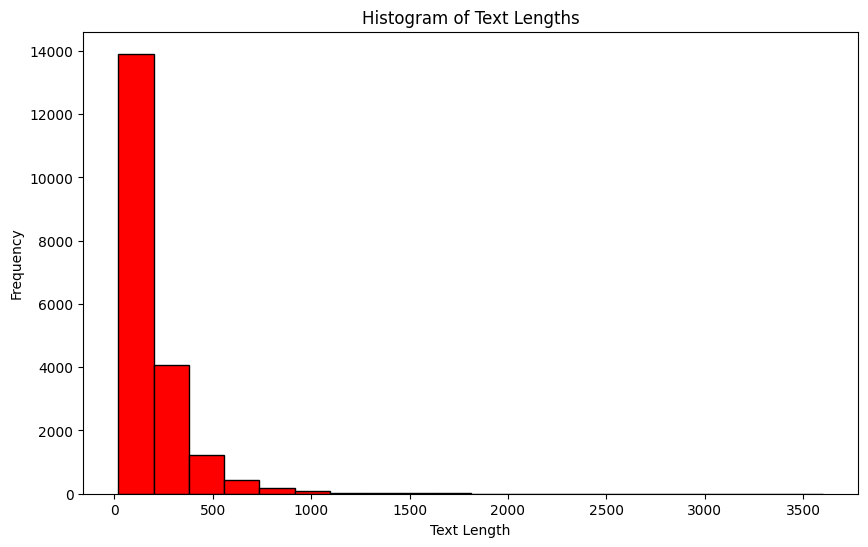

In [ ]:
import matplotlib.pyplot as plt

text_lengths = df2['text'].apply(len)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=20, color='red', edgecolor='black')
plt.title('Histogram of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df2.to_csv('data/reviews.csv', index=False)

In [ ]:
combined_df = pd.concat([df, df1, df2], ignore_index=True)
combined_df.head()

,text,summary
0,The method of obtaining new integrable coupled equations through enlarging spectral problems o...,Enlarged spectral problems and nonintegrability
1,The Open Science Collaboration recently reported that 36% of published findings from psycholog...,Recent reproducibility estimates indicate that negative evidence is observed over 30 times bef...
2,"Inter-Prediction is used effectively in multiple standards, including H.264 and HEVC (also kno...",Improvements of Motion Estimation and Coding using Neural Networks
3,"Proton-proton collision data recorded in 2011 and 2012 by the \lhcb experiment, co\-rres\-pon\...",Observation of the ${B^0 \to \rho^0 \rho^0}$ decay from an amplitude analysis of ${B^0 \to (\p...
4,We give some higher dimensional analogues of the Durfee square formula and point out their rel...,"Multipartitions, Generalized Durfee Squares and Affine Lie Algebra Characters"


In [ ]:
len(combined_df)

43836

In [ ]:
!pip install wordcloud matplotlib


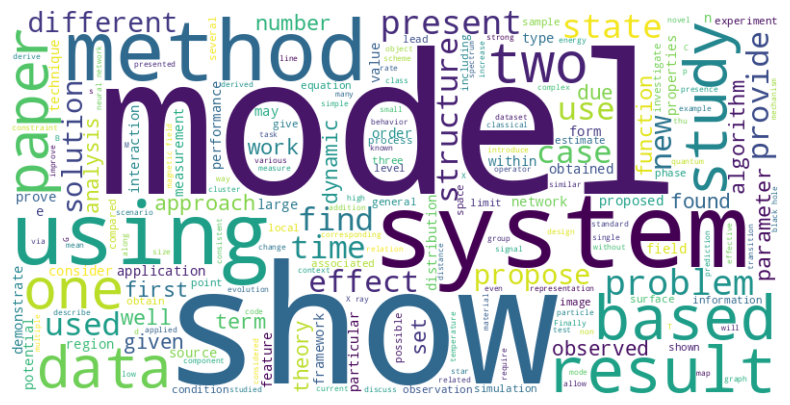

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text_data = df['text'].str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


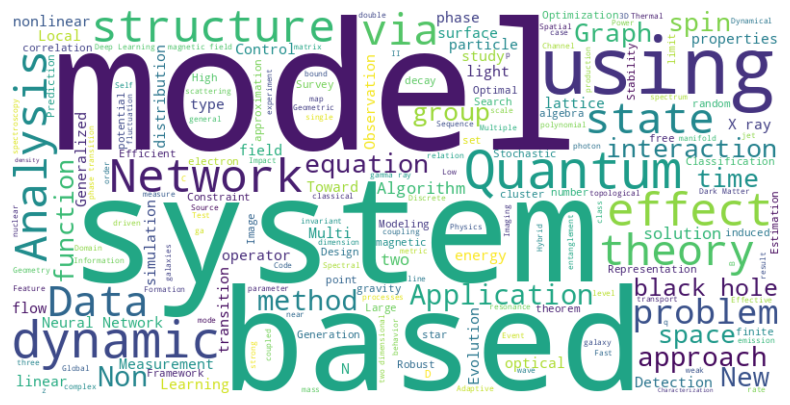

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = df['summary'].str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<Figure size 1200x600 with 0 Axes>

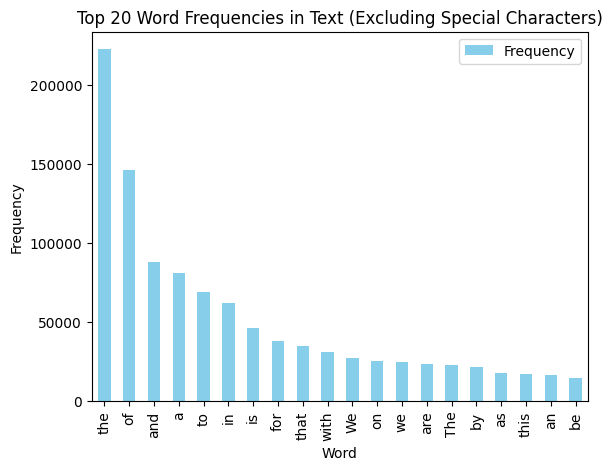

In [ ]:
import nltk
nltk.download('punkt')
from nltk import FreqDist
import matplotlib.pyplot as plt
import re

text_data = df['text'].str.cat(sep=' ')

# Remove special characters and tokenize the text into words
words = nltk.word_tokenize(re.sub(r'[^A-Za-z]', ' ', text_data))

# Calculate word frequencies
word_freq = FreqDist(words)

# Convert word frequencies to a DataFrame for easier plotting
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
word_freq_df[:20].plot(kind='bar', x='Word', y='Frequency', color='skyblue')
plt.title('Top 20 Word Frequencies in Text (Excluding Special Characters)')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

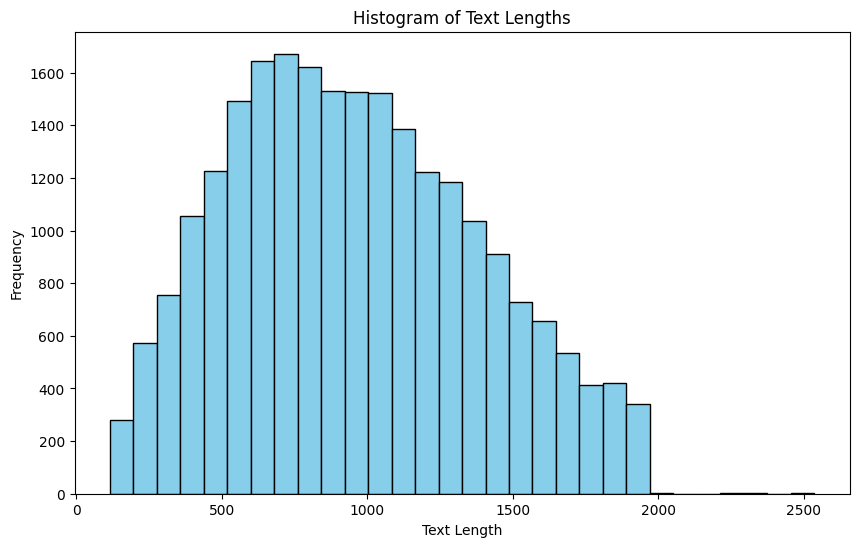

In [ ]:
import matplotlib.pyplot as plt

text_lengths = df['text'].apply(len)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


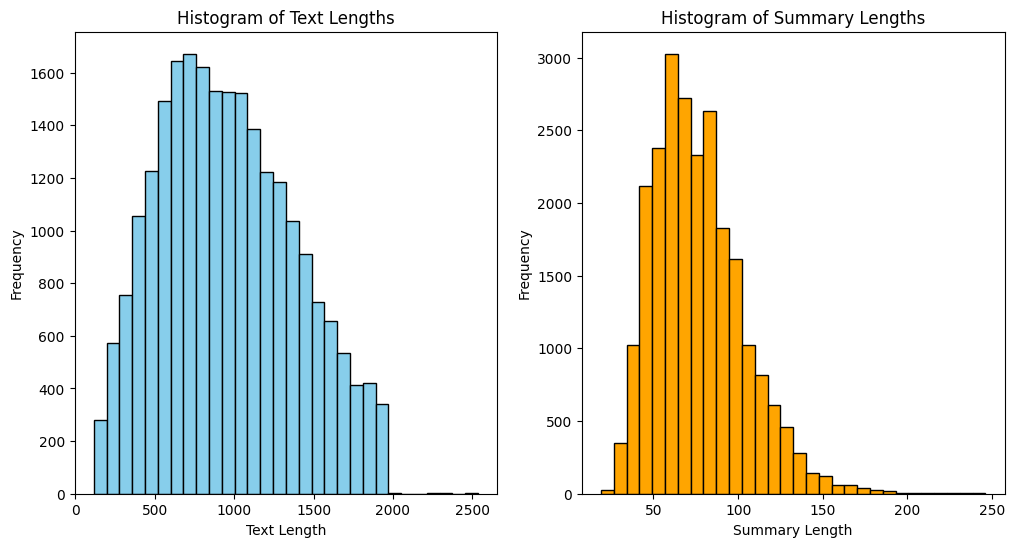

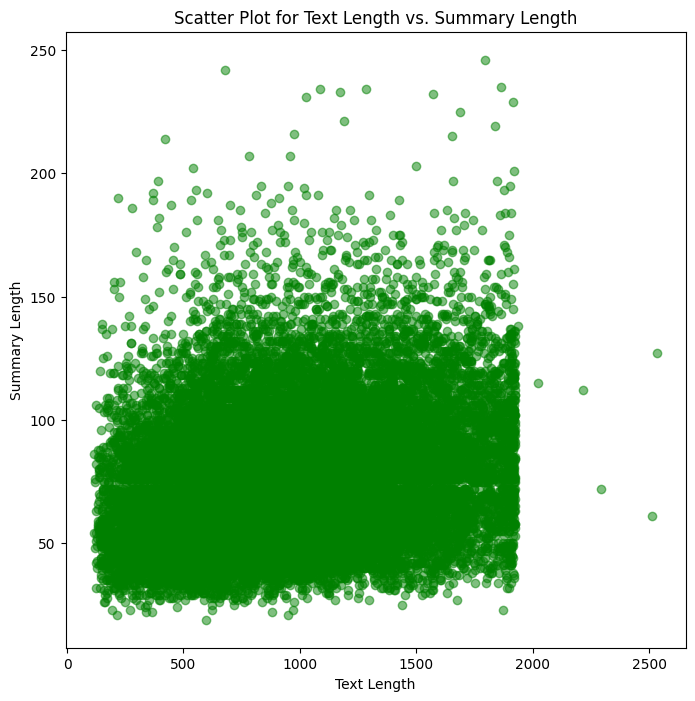

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


text_data = ' '.join(df['text'])
summary_data = ' '.join(df['summary'])



# Histogram of Text and Summary Lengths
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['text'].apply(len), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['summary'].apply(len), bins=30, color='orange', edgecolor='black')
plt.title('Histogram of Summary Lengths')
plt.xlabel('Summary Length')
plt.ylabel('Frequency')

plt.show()

# Scatter Plot for Text Length vs. Summary Length
plt.figure(figsize=(8, 8))
plt.scatter(df['text'].apply(len), df['summary'].apply(len), alpha=0.5, color='green')
plt.title('Scatter Plot for Text Length vs. Summary Length')
plt.xlabel('Text Length')
plt.ylabel('Summary Length')
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap: Text vs. Summary Lengths')

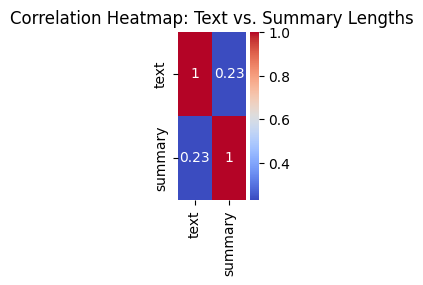

In [ ]:
import seaborn as sns
lengths_corr = df[['text', 'summary']].applymap(len).corr()
plt.subplot(2, 5, 6)
sns.heatmap(lengths_corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: Text vs. Summary Lengths')


In [ ]:
df['source'] = 'Journals'
df1['source'] = 'News Articles'
df2['source'] = 'Reviews'

df['text_length'] = df['text'].apply(len)
df1['text_length'] = df1['text'].apply(len)
df2['text_length'] = df2['text'].apply(len)


df['summary_length'] = df['summary'].apply(len)
df1['summary_length'] = df1['summary'].apply(len)
df2['summary_length'] = df2['summary'].apply(len)
# Combine the datasets
combined_df = pd.concat([df, df1, df2], ignore_index=True)


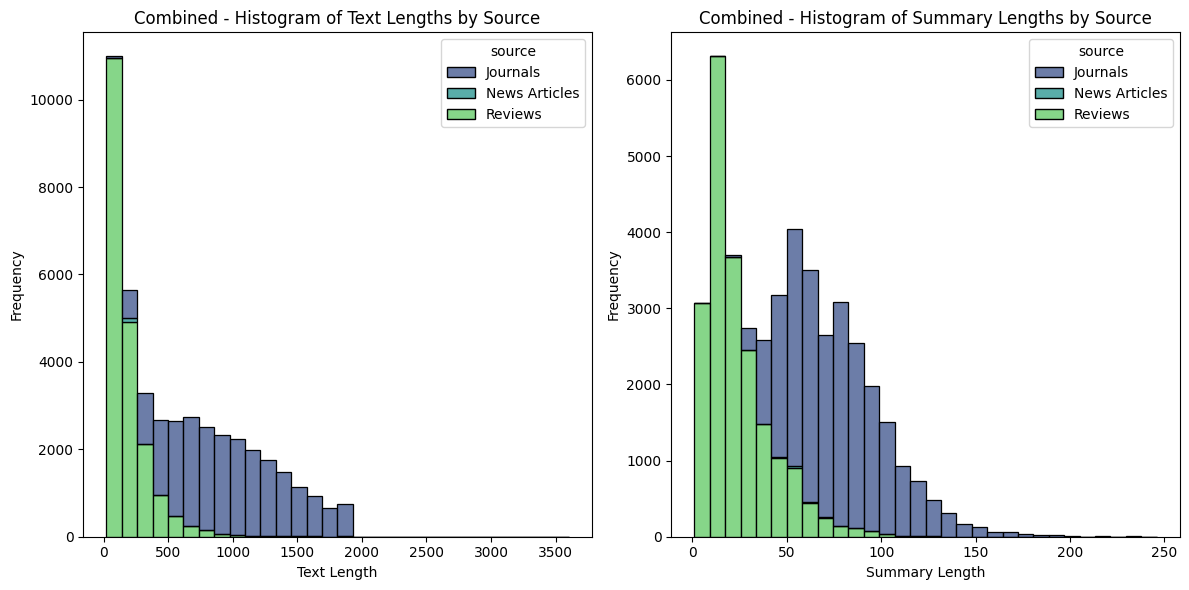

In [ ]:
# Histogram of Combined Text Lengths by Source
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=combined_df, x='text_length', hue='source', bins=30, multiple='stack', palette='viridis', edgecolor='black')
plt.title('Combined - Histogram of Text Lengths by Source')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Histogram of Combined Summary Lengths by Source
plt.subplot(1, 2, 2)
sns.histplot(data=combined_df, x='summary_length', hue='source', bins=30, multiple='stack', palette='viridis', edgecolor='black')
plt.title('Combined - Histogram of Summary Lengths by Source')
plt.xlabel('Summary Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

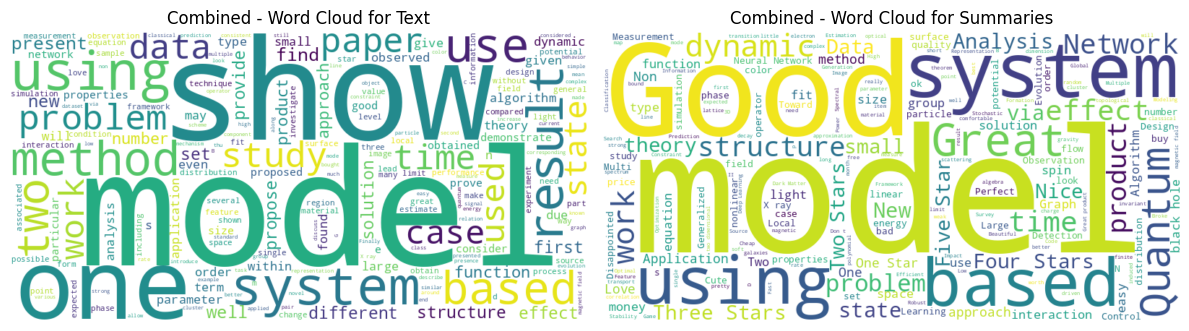

In [ ]:
# Word Cloud for Combined Text
plt.figure(figsize=(12, 6))
wordcloud_combined_text = WordCloud(width=800, height=400, background_color='white').generate(' '.join(combined_df['text']))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_combined_text, interpolation='bilinear')
plt.axis('off')
plt.title('Combined - Word Cloud for Text')

# Word Cloud for Combined Summaries
wordcloud_combined_summary = WordCloud(width=800, height=400, background_color='white').generate(' '.join(combined_df['summary']))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_combined_summary, interpolation='bilinear')
plt.axis('off')
plt.title('Combined - Word Cloud for Summaries')

plt.tight_layout()
plt.show()

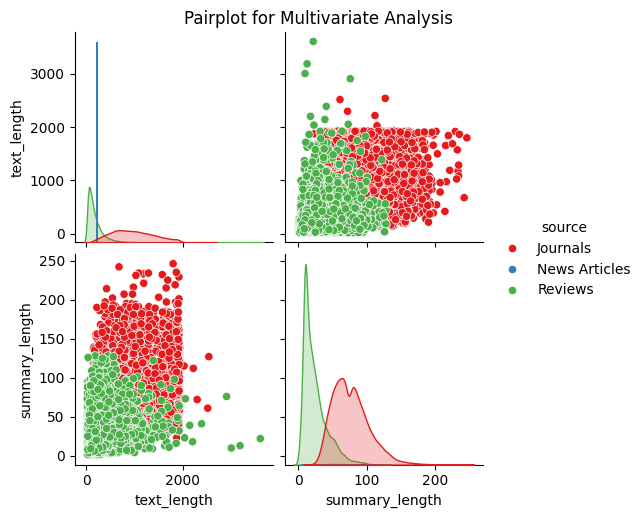

In [ ]:
# Pairplot for Multivariate Analysis
sns.pairplot(combined_df, hue='source', palette='Set1')
plt.suptitle('Pairplot for Multivariate Analysis', y=1.02)
plt.show()

<ipython-input-67-cdc5bae38d36>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='source', data=combined_df, palette='viridis')


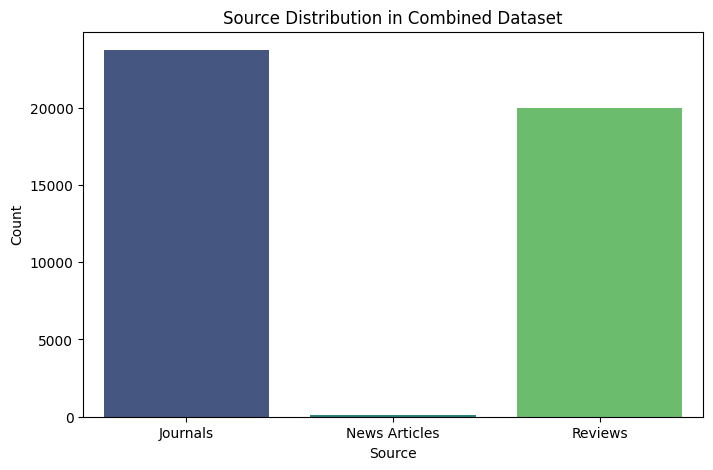

In [ ]:
# Bar Chart for Source Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='source', data=combined_df, palette='viridis')
plt.title('Source Distribution in Combined Dataset')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()